In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(13)

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

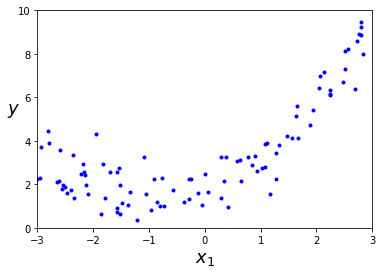

In [5]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures

ploy_f = PolynomialFeatures(degree=2, include_bias=False)
X_poly = ploy_f.fit_transform(X)

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.74419793]), array([[0.99384532, 0.51894833]]))

In [8]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = ploy_f.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

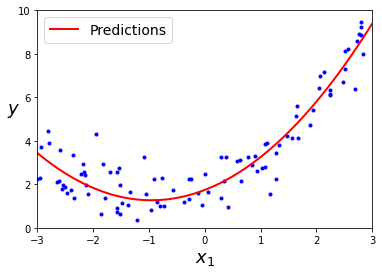

In [9]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

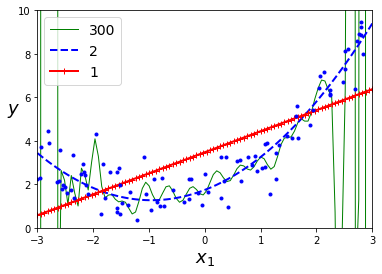

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_f = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([
        ('poly_f', polybig_f),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    polynomial_reg.fit(X, y)
    y_newbig = polynomial_reg.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

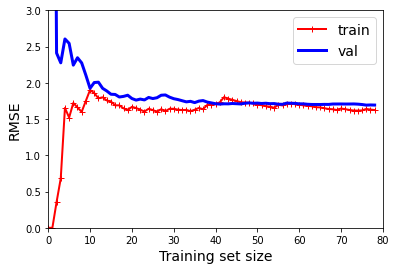

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

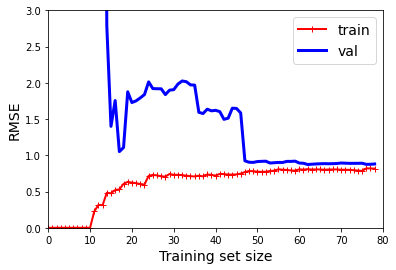

In [23]:
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([
    ('poly_f', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()